# Clipboard Case Study - Justin Babin

#### To maximize net revenue for the next 12 months on the Toledo route, we need to optimize the pricing strategy by adjusting Lyft's Take from each trip. 

#### **Objective**: The goal is to increase the match rates while still maintaining the prevailing rate of \\$25 charged to riders (likely because Lyft's pricing strategy is. Here's the analysis and proposed strategy:

## Current Scenario:

**Prevailing rate:** \$25 per ride charged to the rider.

**Prevailing wage:** \$19 per ride paid to the driver.

**Match rate:** 60\% (only 60 of every 100 rides requested are finding a driver).

**Pricing Experiment Result:** When Lyft's share was reduced from \\$6/ride to \\$3/ride, match rates rose to approximately 93%.
Based on this information, we can conclude that the current Take of \\$6/ride is too high, leading to lower match rates. To find the optimal Take, we need to consider the following factors:

    a) Driver Economics:

        Driver churn: 5% monthly.
        Drivers complete 100 rides/month.
        Driver CAC: \\$400-\\$600.
    
    b) Rider Economics:

        Average ridership: 1 ride/month.
        Riders who experience a "failed to find driver" event churn at 33% monthly, while others churn at 10% monthly.
        Rider CAC: \\$10-\\$20.

## Proposed Strategy:

**Step 1:** Determine the maximum Take that maintains match rates above 90%:

It is already evident from our experiment that decreasing Lyft's Take will increase Match Rate, we still need to consider overall profitability. As a starting point, we will aim to keep match rates above 90%.

**Step 2:** Measure the impact on Driver/Rider churn on overall profitability

Changes in Take might influence rider churn rates, particularly for riders who experience "failed to find driver" events.
We will aim to maximize profitability here and present findings. 

**Step 3:** Identify next steps and recommendations for further improvements:

Identify next steps to further improve overall profitability.

By following this strategy, we can find the optimal Take that maximizes net revenue while maintaining high match rates, managing driver churn, and minimizing rider churn. It's important to continue iterating and monitoring the results, making adjustments as needed to achieve the desired outcome.


In [4]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np


Let Take be `x = 3..6` \\$/ride, as we know the optimal Take per ride is somewhere between the current \\$6 (which leads to insufficient match rates) and the tested $3 (which improves match rates but may reduce profitability). We will seek to measure the differences in profitability as well rider/driver sensitivity to changes in Lyft's Take.

Assuming a linear relationship between Take and match_rate, we get:

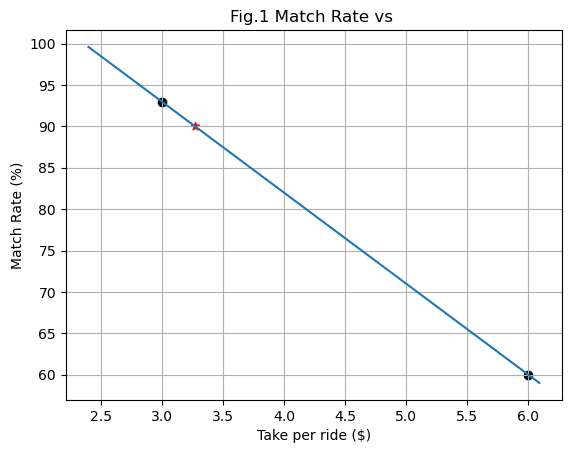

In [2]:
Take_ride = np.arange(2.4, 6.1, 0.01)

match_rate = -11*Take_ride + 126


plt.figure(0)
plt.plot(Take_ride,match_rate)
plt.scatter([3,6],[93,60],c='black')
plt.scatter(3.27,90,c='red',marker='*')
plt.title("Fig.1 Match Rate vs ")
plt.xlabel('Take per ride ($)')
plt.ylabel('Match Rate (%)')
plt.grid()

Given only two data points and assuming a linear relationship, we can see that the optimal Take for lyft is $3.27 in order to achieve a theoretical match_rate of 90%.

Now, we can then paint a better picture by incorporating churn. 
To visualize this more intuitively, we will be  calculating Take per 100 customers Take_100. 

We do this by multiplying the match rate by the Take per ride and subtracting the Rider and Driver Customer Acquisition Costs (cac_rider and cac_driver) multiplied by their respective churn rates (i.e. rider matched, rider unmatched, and driver)

Finally, we can plot Take_100 

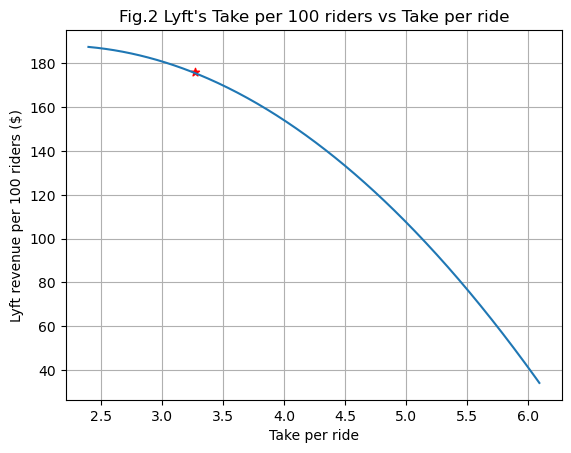

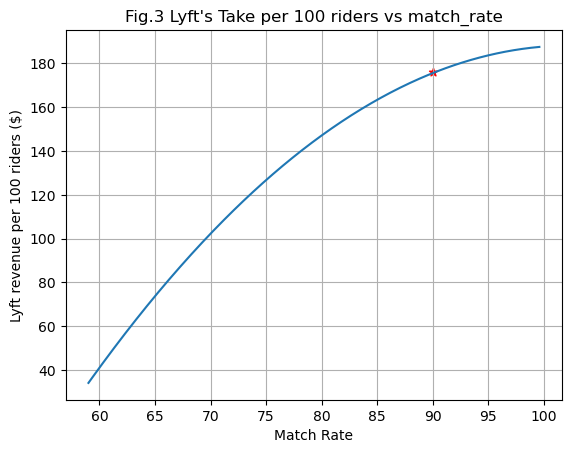

In [3]:
churn_matched = 0.1
churn_unmatched = 0.33
cac_rider = 15 #average Customer Acquisition Cost
churn_driver = 0.05
cac_driver = 500 #average driver CAC

Take_100 = match_rate*Take_ride*(1-churn_matched) - cac_rider*(churn_unmatched+churn_matched)*(100-match_rate) - cac_driver*churn_driver;
plt.figure(1)
plt.plot(Take_ride,Take_100)
plt.scatter(3.27,176,c='red',marker='*')
plt.title("Fig.2 Lyft's Take per 100 riders vs Take per ride") 
plt.xlabel('Take per ride')
plt.ylabel('Lyft revenue per 100 riders ($)')
plt.grid()

plt.figure(2)
plt.plot(match_rate,Take_100)
plt.scatter(90,176,c='red',marker='*')
plt.title("Fig.3 Lyft's Take per 100 riders vs match_rate") 
plt.xlabel('Match Rate')
plt.ylabel('Lyft revenue per 100 riders ($)')
plt.grid()


We see in Figure 3 that increasing match rate is dramatically more profitable from 60%-90%, yet shows diminishing returns on the upper end. Again, given our 2 data points, the upper end of these plots are likely inaccurate. I would expect a peak and drop-off somewhere beyond the 93% match rate, which would certainly present itself with more data points a non-linear relationship between match_rate and Take_ride. Our result of 90% at $3.27 is sufficient for now, but warrants further testing. 

## Next Steps

Now that we've found the optimal Take for Lyft, given our two experiments and accounting for churn, our next steps will be to fine tune this number by running more experiments where we vary the Take per ride so we can better understand the relationship between match rate and Lyft's Take shown in Figure 1. 

We should also explore other variables which impact match rate & churn - for example, if drivers are more frequently switching to competitors, it might not always be due to their wage. E.g competitors may have a better UX or more frequent payments. It would be beneficial to run focus groups with drivers and test changes that would benefit the company as a whole and not just our territory.
